In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("sleep_health_lifestyle_dataset (1).csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())


In [6]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [7]:
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
def train_model(optimizer, activation, batch_size, model_name):
    model = Sequential([
        Dense(32, activation=activation, input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(16, activation=activation),
        Dropout(0.1),
        Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred_class),
        "Loss": model.evaluate(X_test, y_test, verbose=0)[0],
        "MAE": mean_absolute_error(y_test, y_pred_class),
        "MSE": mean_squared_error(y_test, y_pred_class),
        "History": history
    }


In [11]:
exp_adam = train_model(
    optimizer=Adam(learning_rate=0.001),
    activation='relu',
    batch_size=32,
    model_name="Adam + ReLU"
)

exp_sgd = train_model(
    optimizer=SGD(learning_rate=0.01),
    activation='relu',
    batch_size=32,
    model_name="SGD + ReLU"
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [12]:
exp_tanh = train_model(
    optimizer=Adam(learning_rate=0.001),
    activation='tanh',
    batch_size=32,
    model_name="Adam + Tanh"
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [13]:
results = pd.DataFrame([
    exp_adam,
    exp_sgd,
    exp_tanh
]).drop(columns=["History"])

results


,Model,Accuracy,Loss,MAE,MSE
0,Adam + ReLU,0.925,0.359018,0.075,0.075
1,SGD + ReLU,0.925,0.322331,0.075,0.075
2,Adam + Tanh,0.925,0.308215,0.075,0.075


In [14]:
def plot_loss(history, title):
    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


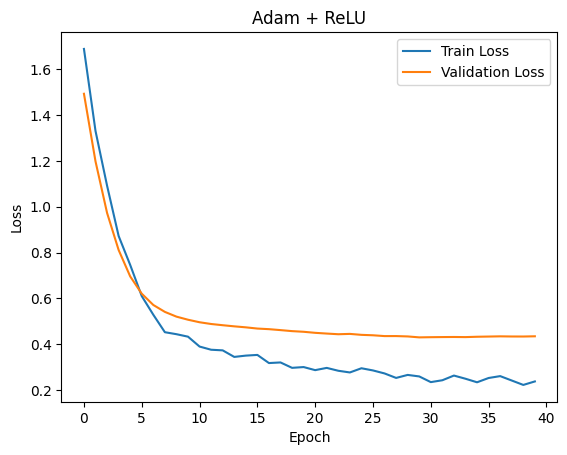

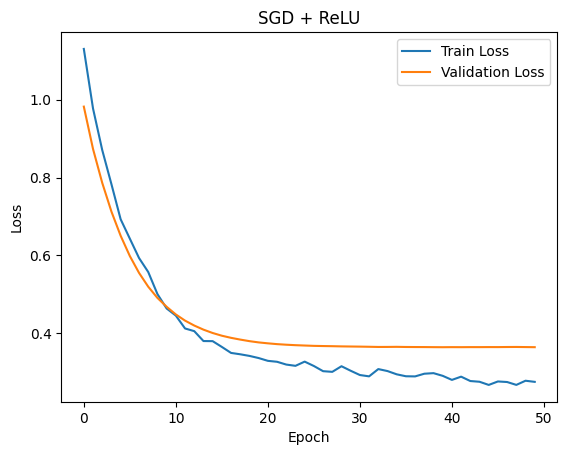

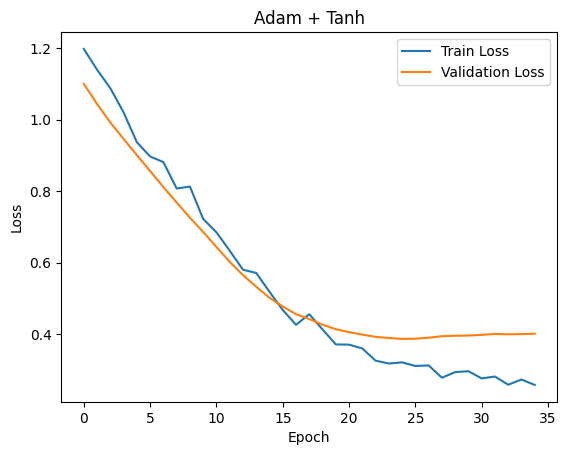

In [15]:
plot_loss(exp_adam["History"], "Adam + ReLU")
plot_loss(exp_sgd["History"], "SGD + ReLU")
plot_loss(exp_tanh["History"], "Adam + Tanh")


In [16]:
final_model = train_model(
    optimizer=Adam(learning_rate=0.001),
    activation='relu',
    batch_size=32,
    model_name="Final Best Model"
)

final_model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


{'Model': 'Final Best Model',
 'Accuracy': 0.925,
 'Loss': 0.31329545378685,
 'MAE': 0.075,
 'MSE': 0.075,
 'History': <keras.src.callbacks.history.History at 0x7a6976b9aab0>}

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


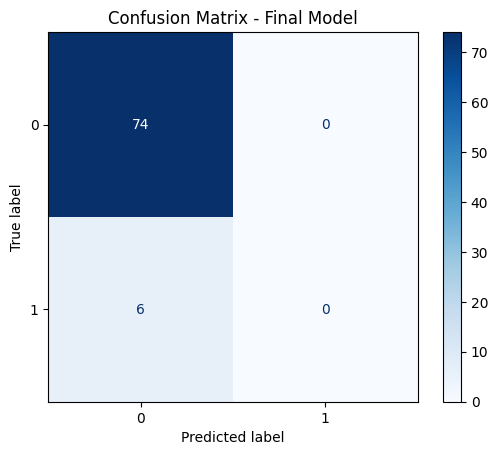

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(3, activation='softmax')
])

best_model_nn.compile(
    optimizer=Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

best_model_nn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

y_pred = np.argmax(best_model_nn.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Final Model")
plt.show()
